# Projeto Final - Machine Learning
- Luca Melão
- Matheus Kwon

----

# 1. Imports necessários

## 1.1. Importando o Dataset

In [26]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns   
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

## 1.2. Importando o Dataset

In [3]:
filepath = 'data/'
filename = 'Airbnb_Open_Data.csv'

if filename in  os.listdir(filepath):
    print(f'Encontrei o arquivo {filename}, tudo certo para prosseguir!')
else:
    print(f'Não encontrei o arquivo {filename} aqui no diretório {os.getcwd()}, será que você não baixou o arquivo na pasta "./data" ?')

Encontrei o arquivo Airbnb_Open_Data.csv, tudo certo para prosseguir!


In [4]:
# Lendo o arquivo
db_original = pd.read_csv(filepath + filename)

# Trabalharemos em uma cópia do dataset
db = db_original.copy()

/var/folders/18/8l06zz3s5_bdw3brnw4jt_bc0000gn/T/ipykernel_1200/4094873204.py:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  db_original = pd.read_csv(filepath + filename)


----

# 2. Informações Gerais

In [5]:
size = db.shape
linhas = size[0]
colunas = size[1]
print(f'Linhas: {linhas}')
print(f'Colunas: {colunas}')

Linhas: 102599
Colunas: 26


In [6]:
display(db.head())

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


----

# 3. Tratamento dos dados

## 3.1. Conversão dos dtypes
Algumas das features, e também o nosso target, estão no formato object, devemos então realizar a conversão para float, string ou demais dtypes.

In [7]:
# Convert price
db['price'] = db['price'].astype(str).apply(lambda x: x.replace('$', '').replace(',', '')).astype('float')

# Convert service fee
db['service fee'] = db['service fee'].astype(str).apply(lambda x: x.replace('nan', '0').replace('$', '')).astype('int')

# Convert country
db['country'] = db['country'].astype(str)

# Convert NAME
db['NAME'] = db['NAME'].astype(str)

# Convert country code
db['country code'] = db['country code'].astype(str)

# Convert host_identity_verified
db['host_identity_verified'] = db.host_identity_verified.map(dict(verified=1, unconfirmed=0))

# Convert host name
db['host name'] = db['host name'].astype(str)

# Convert neighbourhood group
db['neighbourhood group'] = db['neighbourhood group'].astype(str)

# Convert neighbourhood 
db['neighbourhood'] = db['neighbourhood'].astype(str)

# Convert instant bookable
db['instant_bookable'] = pd.to_numeric(db['instant_bookable'], errors='coerce')

# Convert cancelation policy
db['cancellation_policy'] = db['cancellation_policy'].astype(str)

# Convert room type
db['room type'] = db['room type'].astype(str)

# Convert the date from the last review
db['last review'] = pd.to_datetime(db['last review'])

In [8]:
# Validando a conversão definindo o nosso target
target = db['price']
target.describe()

count    102352.000000
mean        625.293536
std         331.671614
min          50.000000
25%         340.000000
50%         624.000000
75%         913.000000
max        1200.000000
Name: price, dtype: float64

## 3.2. Eliminando duplicatas

In [9]:
db.drop_duplicates(keep='first', inplace=True)

## 3.3. Lidando com valores NaN

Com os dados no formato desejado, podemos começar a tratá-los.

In [10]:
# Quantos nulos tenho em cada coluna?
dadosnulls = db.isnull().sum()
dadosnulls[dadosnulls.values > 0]

host_identity_verified               289
lat                                    8
long                                   8
instant_bookable                     105
Construction year                    214
price                                247
minimum nights                       400
number of reviews                    183
last review                        15832
reviews per month                  15818
review rate number                   319
calculated host listings count       319
availability 365                     448
house_rules                        51842
license                           102056
dtype: int64

In [11]:
# Percentualmente
display(round((dadosnulls[dadosnulls.values>0]/linhas)*100, 2).sort_values(ascending=0))

license                           99.47
house_rules                       50.53
last review                       15.43
reviews per month                 15.42
availability 365                   0.44
minimum nights                     0.39
review rate number                 0.31
calculated host listings count     0.31
host_identity_verified             0.28
price                              0.24
Construction year                  0.21
number of reviews                  0.18
instant_bookable                   0.10
lat                                0.01
long                               0.01
dtype: float64

In [12]:
# Todos sao do eua, entao não faz sentido analisar country e country code
db.drop(['country', 'country code'], axis = 1, inplace=True)

# Eliminando as colunas com mais de 50% dos valores nulos, ou colunas que não agregam valor para a análise
db.drop(['id', 'host id', 'host name', 'last review','license','house_rules'], axis = 1, inplace=True)

In [13]:
# Nas colunas quantitativas devemos preencher os nan com as medianas
quant_features = ['Construction year', 'price', 'service fee', 'minimum nights',
                  'number of reviews', 'review rate number', 'availability 365', 'calculated host listings count'  ]

for feature in quant_features:
    db[feature].fillna(value = db[feature].median(), inplace = True)

In [14]:
# Nas colunas qualitativas devemos preencher caso a caso
db.fillna({'reviews_per_month':0}, inplace=True)

db['neighbourhood group'].replace(['manhatan','brookln'],['Manhattan','Brooklyn'],inplace=True)
db['neighbourhood group'].dropna(inplace=True)


# Remove neighbourhood group onde for nulo
db.dropna(subset=['neighbourhood group'], inplace=True)

# Tirando linhas onde a variável "neighbourhood group" possui valores nan 
db['neighbourhood group']=db['neighbourhood group'].dropna()

#Tirando linhas onde a variável que indica se a identidade do anfitrião verificada possui valores nan
db['host_identity_verified']=db['host_identity_verified'].dropna()

#Tirando linhas onde a variável "instant bookable" possui valores nan
db['instant_bookable']=db['instant_bookable'].dropna()

db.fillna({'reviews_per_month':0}, inplace=True)



## Outliers

<AxesSubplot:>

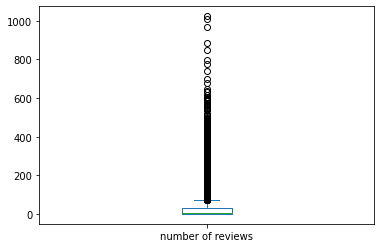

In [15]:
db['number of reviews'].plot.box()

<AxesSubplot:>

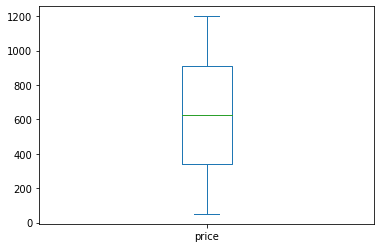

In [16]:
db['price'].plot.box()

<AxesSubplot:>

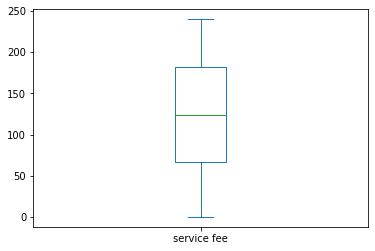

In [17]:
db['service fee'].plot.box()

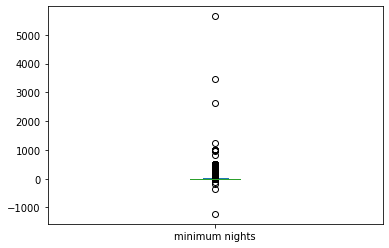

In [18]:
# Outlier
db['minimum nights'].plot.box()

db = db[(db['minimum nights'] > 0) & (db['minimum nights'] < 15)]

<AxesSubplot:>

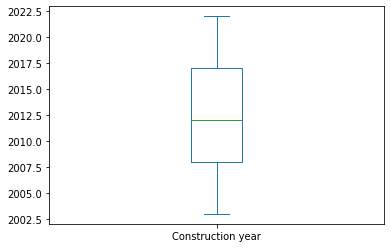

In [19]:
# Está adequado
db['Construction year'].plot.box()

<AxesSubplot:>

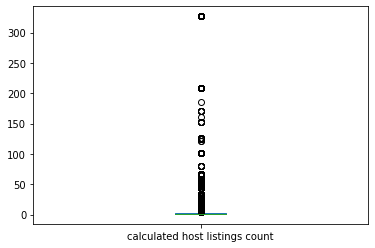

In [20]:
# O maior host tem 324 anúncios!
db["calculated host listings count"].plot.box()

In [21]:
# Base de dados final
display(db.head())

,NAME,host_identity_verified,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
0,Clean & quiet apt home by the park,0.0,Brooklyn,Kensington,40.64749,-73.97237,0.0,strict,Private room,2020.0,966.0,193,10.0,9.0,0.21,4.0,6.0,286.0
2,THE VILLAGE OF HARLEM....NEW YORK !,NaN,Manhattan,Harlem,40.80902,-73.94190,1.0,flexible,Private room,2005.0,620.0,124,3.0,0.0,NaN,5.0,1.0,352.0
4,Entire Apt: Spacious Studio/Loft by central park,1.0,Manhattan,East Harlem,40.79851,-73.94399,0.0,moderate,Entire home/apt,2009.0,204.0,41,10.0,9.0,0.10,3.0,1.0,289.0
5,Large Cozy 1 BR Apartment In Midtown East,1.0,Manhattan,Murray Hill,40.74767,-73.97500,1.0,flexible,Entire home/apt,2013.0,577.0,115,3.0,74.0,0.59,3.0,1.0,374.0
8,Large Furnished Room Near B'way,1.0,Manhattan,Hell's Kitchen,40.76489,-73.98493,1.0,strict,Private room,2005.0,1018.0,204,2.0,430.0,3.47,3.0,1.0,180.0


----

# 4. Análise Exploratória

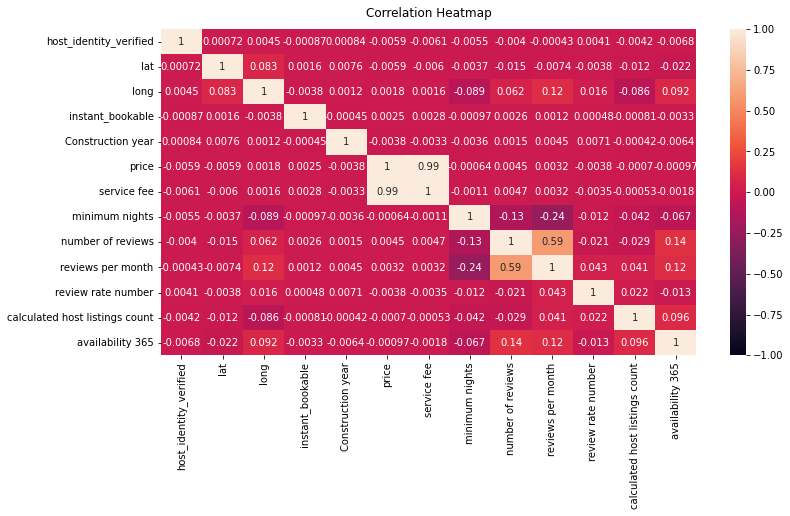

In [22]:
plt.figure(figsize=(12, 6))

heatmap = sns.heatmap(db.corr(), vmin=-1, vmax=1, annot=True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

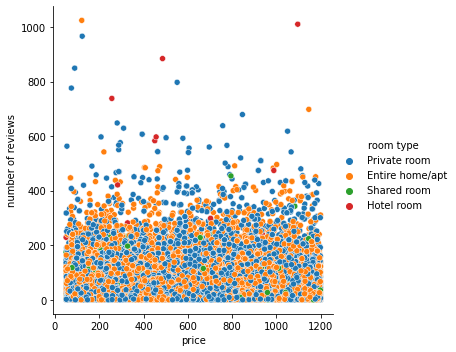

In [23]:
sns.relplot(data=db, kind='scatter', x='price', y='number of reviews', hue='room type');

In [24]:
top_10 = db.nlargest(10,'number of reviews')
mean = top_10.price.mean()
print('Avg price per night: {}'.format(mean))

top_10.head(10)

Avg price per night: 479.3


,NAME,host_identity_verified,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
52488,Sonder Battery Park | Studio Apartment,1.0,Manhattan,Financial District,40.70617,-74.01486,0.0,strict,Entire home/apt,2019.0,121.0,24,2.0,1024.0,57.31,4.0,54.0,365.0
62244,City King,1.0,Manhattan,SoHo,40.72440,-74.00794,0.0,moderate,Hotel room,2017.0,1097.0,219,1.0,1010.0,33.08,4.0,11.0,80.0
49799,Amazing Micro Unit W/ communal rooftop and kit...,1.0,Manhattan,East Village,40.72380,-73.99038,1.0,strict,Private room,2011.0,123.0,25,1.0,966.0,34.46,2.0,4.0,355.0
53078,Enjoy great views of the City!,0.0,Manhattan,Theater District,40.75876,-73.98846,0.0,flexible,Hotel room,2004.0,486.0,97,1.0,884.0,25.23,3.0,9.0,360.0
49653,Come catch a Broadway Show & stay in Times Square,1.0,Manhattan,Theater District,40.76360,-73.98473,0.0,flexible,Private room,2008.0,89.0,18,1.0,849.0,90.00,4.0,12.0,361.0
49827,Hudson River View King Bed at Higher Floor,0.0,Manhattan,Theater District,40.76190,-73.98454,0.0,moderate,Private room,2004.0,552.0,110,1.0,797.0,84.49,4.0,12.0,361.0
49605,Beautiful Standard Full Room at The Ridge,0.0,Manhattan,Lower East Side,40.72259,-73.98841,0.0,strict,Private room,2018.0,74.0,15,1.0,776.0,30.51,4.0,4.0,338.0
57532,King Room City,1.0,Manhattan,Midtown,40.74623,-73.98499,1.0,strict,Hotel room,2012.0,257.0,51,1.0,738.0,24.49,3.0,11.0,118.0
50780,THE PRIVACY DEN ~ 5 MINUTES TO JFK,0.0,Queens,Jamaica,40.66946,-73.76679,1.0,moderate,Entire home/apt,2005.0,1147.0,229,1.0,698.0,10.55,5.0,1.0,74.0
54308,Entire New Apartment in Park Slope / Gowanus,0.0,Brooklyn,Gowanus,40.66714,-73.99411,1.0,moderate,Private room,2008.0,847.0,169,1.0,679.0,9.51,2.0,1.0,65.0


## Análise de palavras chave nos anúncios 

There are 3288139 words in the combination of all cells in column NAME.


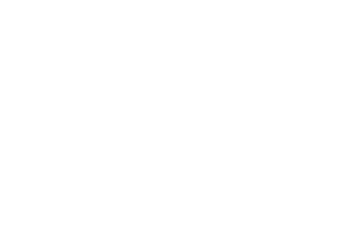

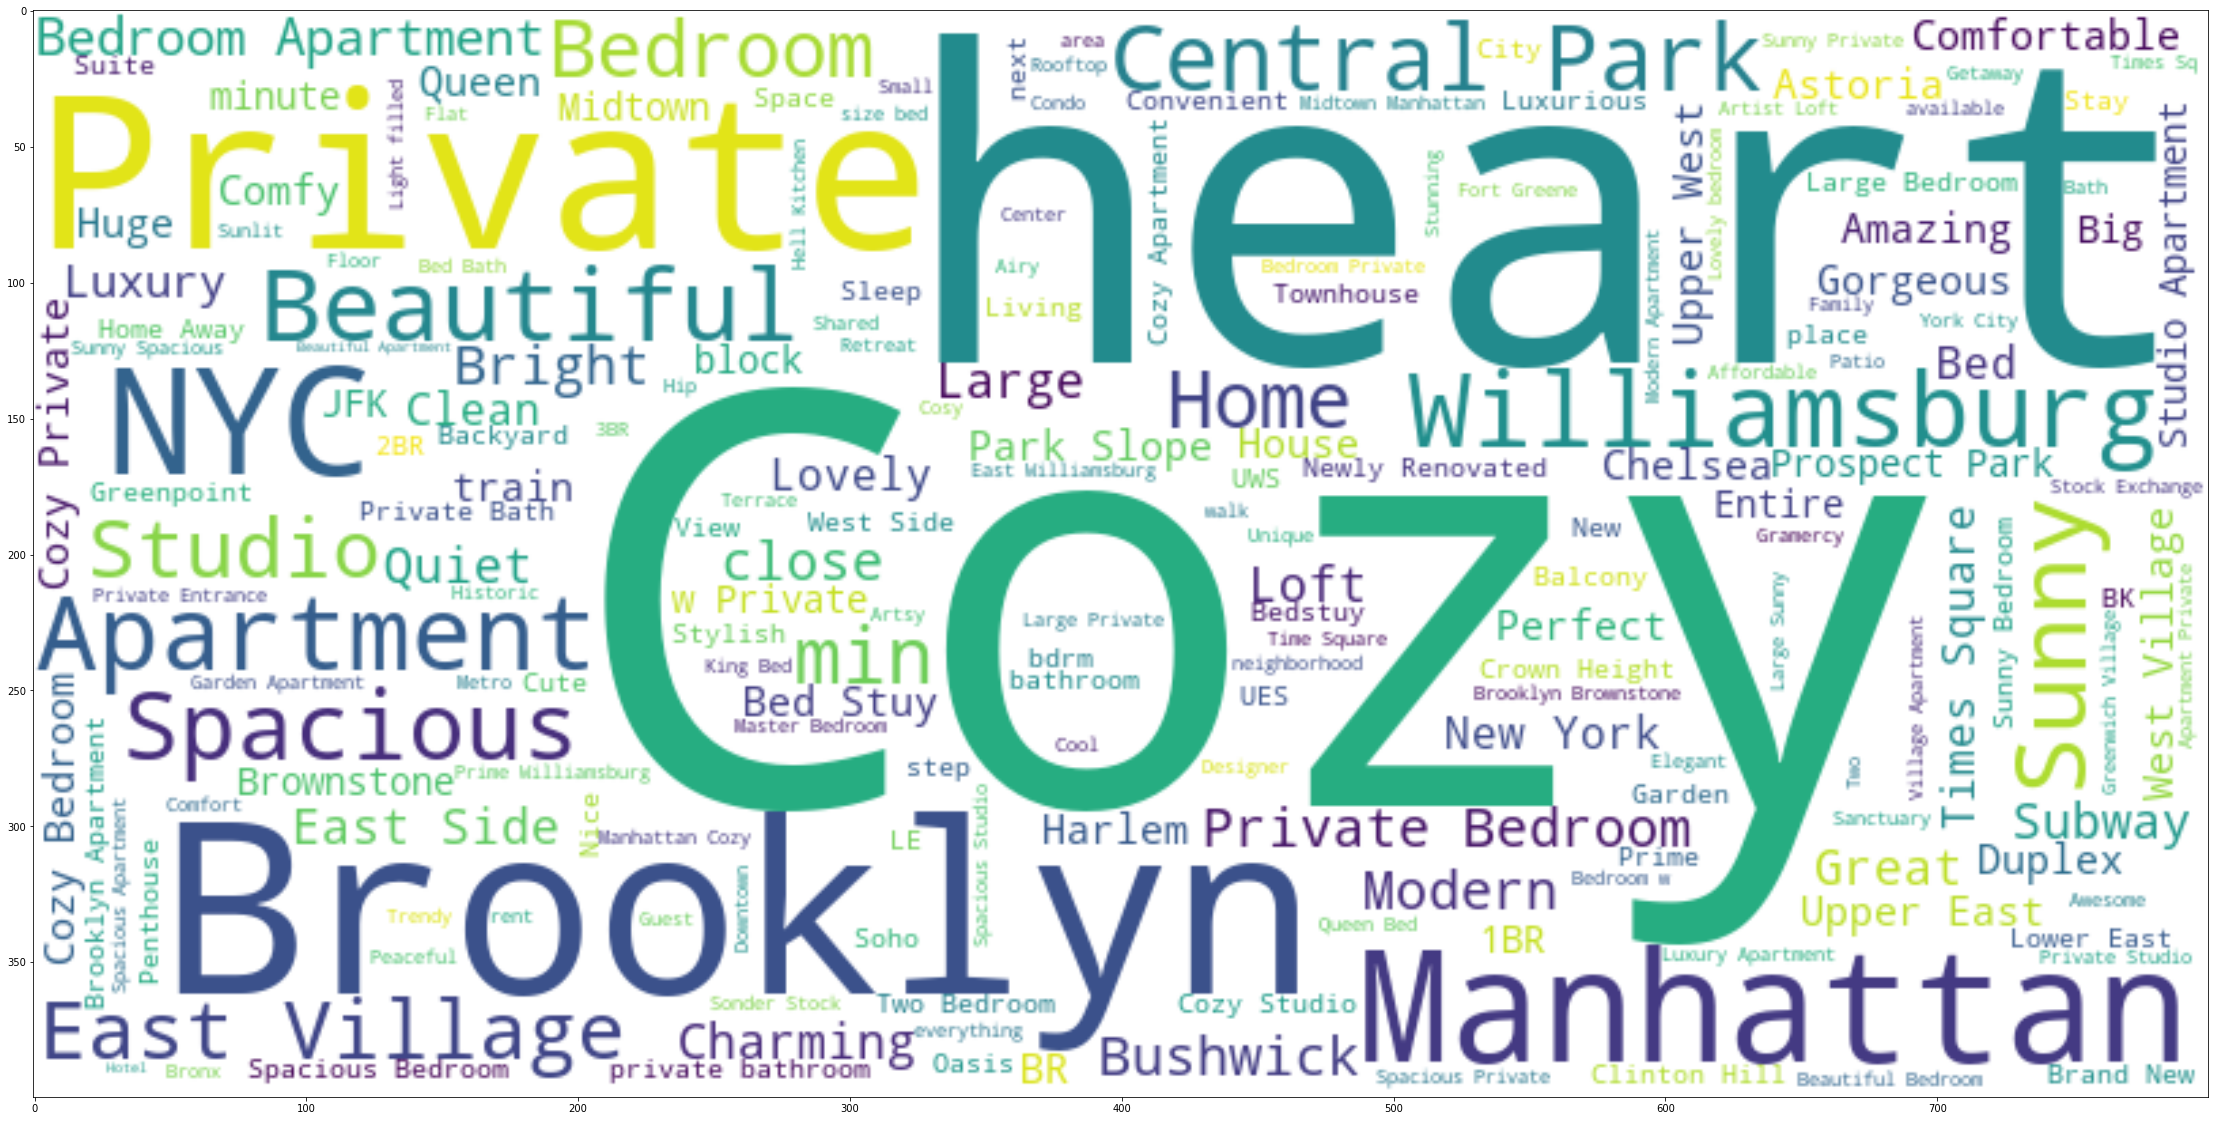

In [25]:
# Extraído de:
# https://www.kaggle.com/code/bhargavichintalapati/airbnb-data-cleaning-visualization#6.-Word-Cloud

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#get the words to perform the the words cloud
text = " ".join(review for review in db.NAME.astype(str))
print ("There are {} words in the combination of all cells in column NAME.".format(len(text)))

#set the stop words by default which you will not include
stopwords = set(STOPWORDS)


#Add custom word exlusions
stopwords.update(["guidelines", "implemented", "access", "Average", "near","room", 'one', "Location", "Best",'Apt', 'stop', 'Full', 'NY','Gem', 'Chic'])

wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(text)

plt.axis("off");
plt.figure(figsize=(40,20));
plt.tight_layout(pad=0);
plt.imshow(wordcloud, interpolation='bilinear');
plt.show();

## Regressão inicial

In [27]:
# Features
X = db[['number of reviews', 'review rate number', 'minimum nights', 'availability 365', 'calculated host listings count', 'Construction year']]

# Target
Y = db['price']

# Randomizador
RANDOM_SEED = 42

# Temos também o split de validação 
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, Y, test_size=0.20, random_state=RANDOM_SEED)

X_train, X_val, y_train, y_val = train_test_split(X_train_val,
                                                  y_train_val,
                                                  test_size=0.25,
                                                  random_state=RANDOM_SEED)

In [29]:
# Fit do modelo
import statsmodels.api as sm
model = sm.OLS(Y, X).fit()
# Sumário
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.781
Model:                            OLS   Adj. R-squared (uncentered):              0.781
Method:                 Least Squares   F-statistic:                          5.133e+04
Date:                Wed, 23 Nov 2022   Prob (F-statistic):                        0.00
Time:                        14:16:37   Log-Likelihood:                     -6.2197e+05
No. Observations:               86135   AIC:                                  1.244e+06
Df Residuals:                   86129   BIC:                                  1.244e+06
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------

In [31]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

a = model.fit(X_train, y_train)
y_pred = model.predict(X_val)

RMSE = 100 * (10**np.sqrt(mean_squared_error(y_val, y_pred)) - 1)
print(f'erro = {round(RMSE, 2)} %')

erro = 10934682.11 %


# Ideias de análise

- 1. Explorar o impacto da service fee (percentualmente) na preferencia ou precificacao dos anuncios.
- 2. Estudo por regiao, localizacao X bairros marginalizados X preco
- 3. Análise do modo como o nome do anúncio é feito
- 4. Pelo 'host id' podemos ver quais proprietarios possuem mais listings no airbnb e como fazem uso disso ao seu favor.